# import packages

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import MinMaxScaler
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.metrics import r2_score

# import data

In [ ]:
# membuat akses ke google drive untuk load data

from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [ ]:
df = pd.read_csv("/content/drive/MyDrive/CSV/dataset/Gemastik/indonesian_agriculture.csv")

df.head()

,Unnamed: 0,Year,Area_harvested_(ha),Yield_(hg/ha),Production_(tonnes),Temperature_Change,Emissions_CH4,Emissions_N2O,Average_Precipitation,Nutrient_N,Nutrient_P2O5,Nutrient_K2O
0,0,1991,10281519.0,43465.0,44688240.0,0.273,2173.8010,32.3086,2702,1551700.0,577700.0,270700.0
1,1,1992,11103317.0,43446.0,48240008.0,0.341,2347.5521,35.3340,2702,1697000.0,593000.0,293000.0
2,2,1993,11012780.0,43750.0,48181088.0,0.289,2328.4100,32.4377,2702,1557900.0,539700.0,219400.0
3,3,1994,10733800.0,43453.0,46641500.0,0.343,2269.4259,34.3345,2702,1649000.0,518000.0,300000.0
4,4,1995,11438760.0,43487.0,49744140.0,0.382,2418.4741,38.3947,2702,1844000.0,385200.0,300000.0


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             30 non-null     int64  
 1   Year                   30 non-null     int64  
 2   Area_harvested_(ha)    30 non-null     float64
 3   Yield_(hg/ha)          30 non-null     float64
 4   Production_(tonnes)    30 non-null     float64
 5   Temperature_Change     30 non-null     float64
 6   Emissions_CH4          30 non-null     float64
 7   Emissions_N2O          30 non-null     float64
 8   Average_Precipitation  30 non-null     int64  
 9   Nutrient_N             30 non-null     float64
 10  Nutrient_P2O5          30 non-null     float64
 11  Nutrient_K2O           30 non-null     float64
dtypes: float64(9), int64(3)
memory usage: 2.9 KB


In [ ]:
df

,Unnamed: 0,Year,Area_harvested_(ha),Yield_(hg/ha),Production_(tonnes),Temperature_Change,Emissions_CH4,Emissions_N2O,Average_Precipitation,Nutrient_N,Nutrient_P2O5,Nutrient_K2O
0,0,1991,10281519.0,43465.0,44688240.00,0.273,2173.8010,32.3086,2702,1551700.00,577700.00,270700.00
1,1,1992,11103317.0,43446.0,48240008.00,0.341,2347.5521,35.3340,2702,1697000.00,593000.00,293000.00
2,2,1993,11012780.0,43750.0,48181088.00,0.289,2328.4100,32.4377,2702,1557900.00,539700.00,219400.00
3,3,1994,10733800.0,43453.0,46641500.00,0.343,2269.4259,34.3345,2702,1649000.00,518000.00,300000.00
4,4,1995,11438760.0,43487.0,49744140.00,0.382,2418.4741,38.3947,2702,1844000.00,385200.00,300000.00
5,5,1996,11569729.0,44168.0,51101504.00,0.428,2446.1647,43.3919,2702,2084000.00,331900.00,300000.00
6,6,1997,11140594.0,44322.0,49377056.00,0.463,2355.4335,35.5339,2702,1706600.00,280000.00,241000.00
7,7,1998,11730200.0,41974.0,49236700.00,1.050,2480.0927,44.1602,2702,2120900.00,361800.00,245000.00
8,8,1999,11963204.0,42519.0,50866388.00,0.282,2529.3563,40.0917,2702,1925500.00,324000.00,275000.00
9,9,2000,11793000.0,44007.0,51898000.00,0.275,2493.3704,40.9016,2702,1964400.00,263100.00,266000.00


# Prepare feature data and label

In [ ]:
features = df[['Year', 'Area_harvested_(ha)', 'Yield_(hg/ha)', 'Temperature_Change', 'Emissions_CH4',
                 'Emissions_N2O', 'Average_Precipitation', 'Nutrient_N', 'Nutrient_P2O5', 'Nutrient_K2O']]
labels = df['Production_(tonnes)']

In [ ]:
df.head()

,Unnamed: 0,Year,Area_harvested_(ha),Yield_(hg/ha),Production_(tonnes),Temperature_Change,Emissions_CH4,Emissions_N2O,Average_Precipitation,Nutrient_N,Nutrient_P2O5,Nutrient_K2O
0,0,1991,10281519.0,43465.0,44688240.0,0.273,2173.8010,32.3086,2702,1551700.0,577700.0,270700.0
1,1,1992,11103317.0,43446.0,48240008.0,0.341,2347.5521,35.3340,2702,1697000.0,593000.0,293000.0
2,2,1993,11012780.0,43750.0,48181088.0,0.289,2328.4100,32.4377,2702,1557900.0,539700.0,219400.0
3,3,1994,10733800.0,43453.0,46641500.0,0.343,2269.4259,34.3345,2702,1649000.0,518000.0,300000.0
4,4,1995,11438760.0,43487.0,49744140.0,0.382,2418.4741,38.3947,2702,1844000.0,385200.0,300000.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             30 non-null     int64  
 1   Year                   30 non-null     int64  
 2   Area_harvested_(ha)    30 non-null     float64
 3   Yield_(hg/ha)          30 non-null     float64
 4   Production_(tonnes)    30 non-null     float64
 5   Temperature_Change     30 non-null     float64
 6   Emissions_CH4          30 non-null     float64
 7   Emissions_N2O          30 non-null     float64
 8   Average_Precipitation  30 non-null     int64  
 9   Nutrient_N             30 non-null     float64
 10  Nutrient_P2O5          30 non-null     float64
 11  Nutrient_K2O           30 non-null     float64
dtypes: float64(9), int64(3)
memory usage: 2.9 KB


# Apply feature engineering

In [ ]:
# Creating a new feature 'Yield_Per_Area' by dividing 'Yield_(hg/ha)' with 'Area_harvested_(ha)'
df['Yield_Per_Area'] = df['Yield_(hg/ha)'] / df['Area_harvested_(ha)']

# Creating a new feature 'Total_Emissions' by summing 'Emissions_CH4' and 'Emissions_N2O'
df['Total_Emissions'] = df['Emissions_CH4'] + df['Emissions_N2O']

# Creating a new feature 'Total_Emissions' by summing 'Emissions_CH4' and 'Emissions_N2O'
df['Total_Nutrient'] = df['Nutrient_N'] + df['Nutrient_P2O5'] + df['Nutrient_K2O']

In [ ]:
df.head()

,Unnamed: 0,Year,Area_harvested_(ha),Yield_(hg/ha),Production_(tonnes),Temperature_Change,Emissions_CH4,Emissions_N2O,Average_Precipitation,Nutrient_N,Nutrient_P2O5,Nutrient_K2O,Yield_Per_Area,Total_Emissions,Total_Nutrient
0,0,1991,10281519.0,43465.0,44688240.0,0.273,2173.8010,32.3086,2702,1551700.0,577700.0,270700.0,0.004227,2206.1096,2400100.0
1,1,1992,11103317.0,43446.0,48240008.0,0.341,2347.5521,35.3340,2702,1697000.0,593000.0,293000.0,0.003913,2382.8861,2583000.0
2,2,1993,11012780.0,43750.0,48181088.0,0.289,2328.4100,32.4377,2702,1557900.0,539700.0,219400.0,0.003973,2360.8477,2317000.0
3,3,1994,10733800.0,43453.0,46641500.0,0.343,2269.4259,34.3345,2702,1649000.0,518000.0,300000.0,0.004048,2303.7604,2467000.0
4,4,1995,11438760.0,43487.0,49744140.0,0.382,2418.4741,38.3947,2702,1844000.0,385200.0,300000.0,0.003802,2456.8688,2529200.0


# Data cleaning

In [ ]:
# Check for missing values in the DataFrame
missing_values = df.isnull().sum()
print("Missing values:\n", missing_values)

# Replace missing values with mean values
df.fillna(df.mean(), inplace=True)

# Verify if missing values have been replaced
missing_values_after = df.isnull().sum()
print("\nMissing values after replacement:\n", missing_values_after)

Missing values:
 Unnamed: 0               0
Year                     0
Area_harvested_(ha)      0
Yield_(hg/ha)            0
Production_(tonnes)      0
Temperature_Change       0
Emissions_CH4            0
Emissions_N2O            0
Average_Precipitation    0
Nutrient_N               0
Nutrient_P2O5            0
Nutrient_K2O             0
Yield_Per_Area           0
Total_Emissions          0
Total_Nutrient           0
dtype: int64

Missing values after replacement:
 Unnamed: 0               0
Year                     0
Area_harvested_(ha)      0
Yield_(hg/ha)            0
Production_(tonnes)      0
Temperature_Change       0
Emissions_CH4            0
Emissions_N2O            0
Average_Precipitation    0
Nutrient_N               0
Nutrient_P2O5            0
Nutrient_K2O             0
Yield_Per_Area           0
Total_Emissions          0
Total_Nutrient           0
dtype: int64



# Plotting the data

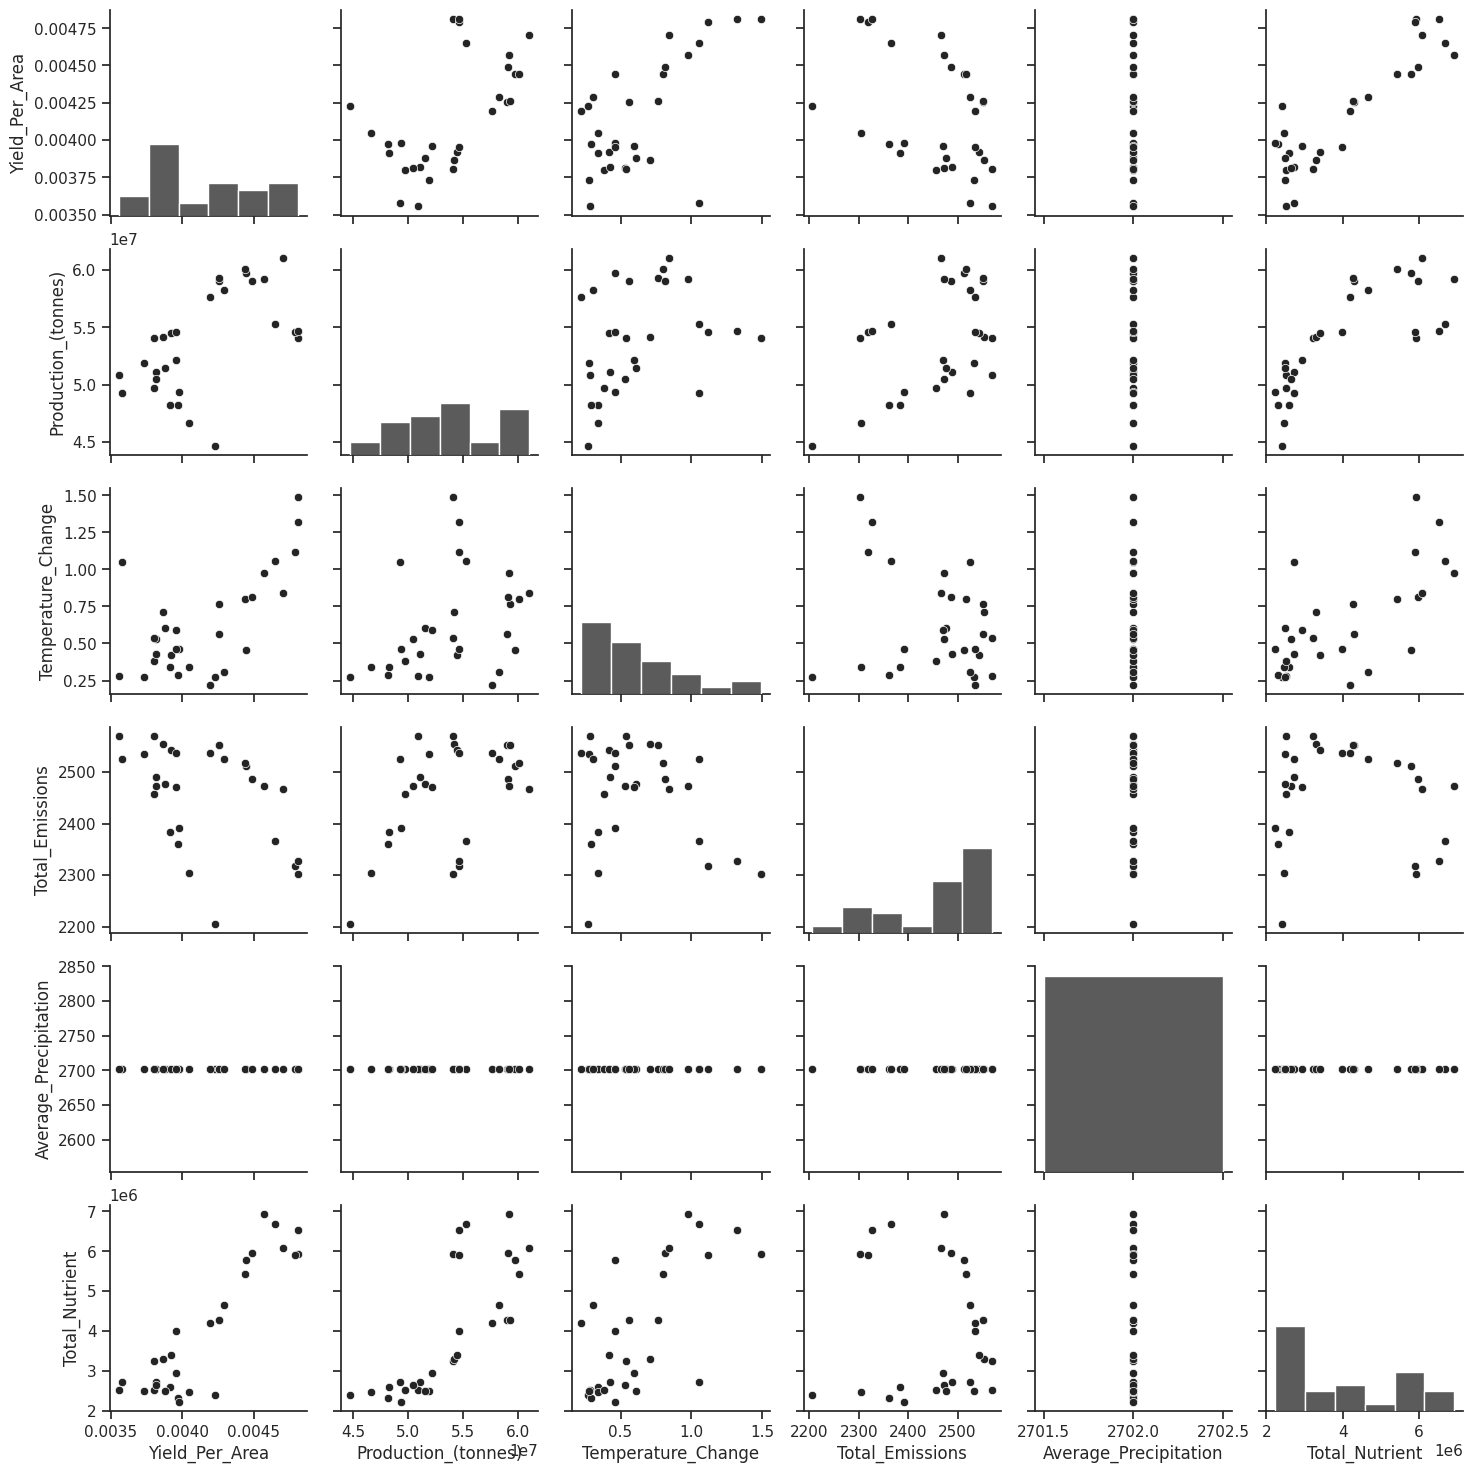

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set the style to black and white
sns.set(style="ticks", palette="gray")

# Select the variables for plotting
variables = ['Yield_Per_Area', 'Production_(tonnes)', 'Temperature_Change', 'Total_Emissions', 'Average_Precipitation', 'Total_Nutrient']

# Create a subset of the dataframe with the selected variables
data_subset = df[variables]

# Plot the pairplot
sns.pairplot(data_subset)

# Remove the spines
sns.despine()

# Display the plot
plt.show()


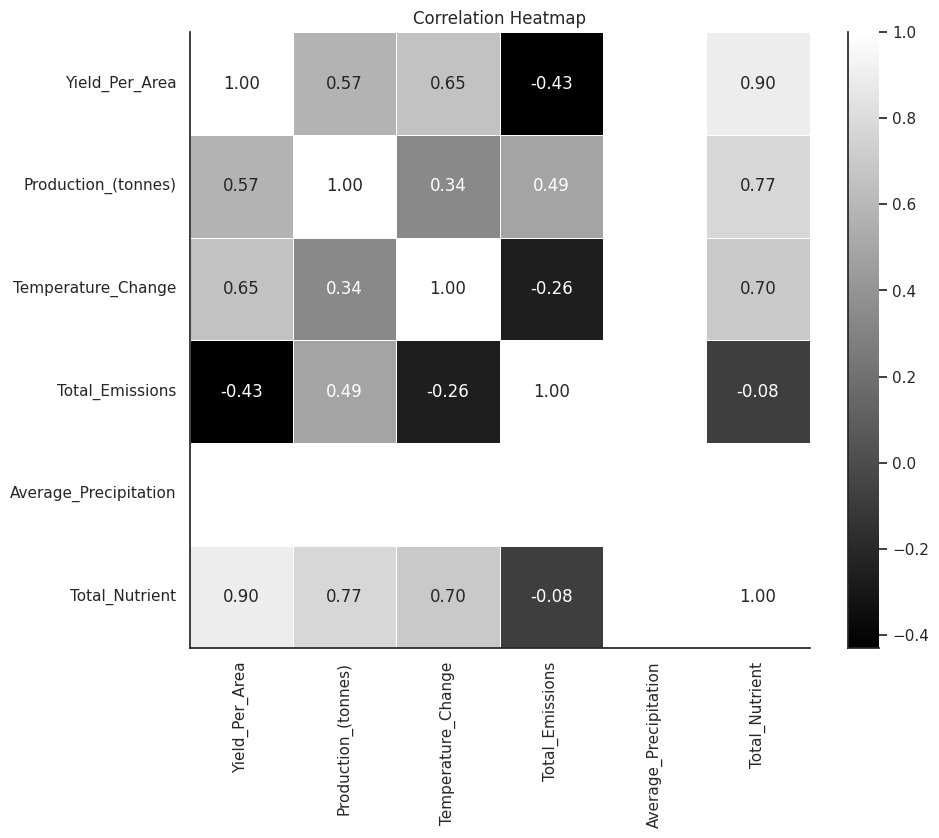

In [ ]:
# Calculate the correlation matrix
correlation_matrix = df[['Yield_Per_Area', 'Production_(tonnes)', 'Temperature_Change',
                        'Total_Emissions', 'Average_Precipitation', 'Total_Nutrient']].corr()

# Set the style to black and white
sns.set(style="white")

# Create the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="gray", fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap")

# Remove the spines
sns.despine()

# Display the plot
plt.show()



# Normalize data

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import MinMaxScaler, StandardScaler

# Memilih kolom-kolom sebagai fitur
feature_columns = ['Yield_Per_Area', 'Temperature_Change', 'Total_Emissions', 'Average_Precipitation', 'Total_Nutrient']

# Memisahkan fitur dan target
X = df[feature_columns]
y = df['Production_(tonnes)']

# Normalisasi data
scaler = MinMaxScaler()
X_normalized = scaler.fit_transform(X)

# Penskalaan data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_normalized)

# Membagi data menjadi data pelatihan dan pengujian
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

print(df.head())


   Unnamed: 0  Year  Area_harvested_(ha)  Yield_(hg/ha)  Production_(tonnes)  \
0           0  1991           10281519.0        43465.0           44688240.0   
1           1  1992           11103317.0        43446.0           48240008.0   
2           2  1993           11012780.0        43750.0           48181088.0   
3           3  1994           10733800.0        43453.0           46641500.0   
4           4  1995           11438760.0        43487.0           49744140.0   

   Temperature_Change  Emissions_CH4  Emissions_N2O  Average_Precipitation  \
0               0.273      2173.8010        32.3086                   2702   
1               0.341      2347.5521        35.3340                   2702   
2               0.289      2328.4100        32.4377                   2702   
3               0.343      2269.4259        34.3345                   2702   
4               0.382      2418.4741        38.3947                   2702   

   Nutrient_N  Nutrient_P2O5  Nutrient_K2O  Yield_

# Select the machine learning model for regression, SVM, and MLP

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor

# Inisialisasi model regresi linear
linear_regression_model = LinearRegression()

# Inisialisasi model SVM
svm_model = SVR()

# Inisialisasi model MLP
mlp_model = MLPRegressor()

# Melatih model pada data pelatihan
linear_regression_model.fit(X_train, y_train)
svm_model.fit(X_train, y_train)
mlp_model.fit(X_train, y_train)

# Evaluasi model pada data pengujian
linear_regression_score = linear_regression_model.score(X_test, y_test)
svm_score = svm_model.score(X_test, y_test)
mlp_score = mlp_model.score(X_test, y_test)

# Melakukan prediksi menggunakan model
linear_regression_predictions = linear_regression_model.predict(X_test)
svm_predictions = svm_model.predict(X_test)
mlp_predictions = mlp_model.predict(X_test)

# Menampilkan skor evaluasi
print("Linear Regression Score:", linear_regression_score)
print("SVM Score:", svm_score)
print("MLP Score:", mlp_score)


Linear Regression Score: 0.9748910832296173
SVM Score: -0.19308051732817622
MLP Score: -277.883181950847


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import StandardScaler

# Define the parameter grids for grid search
linear_regression_param_grid = {
    'fit_intercept': [True, False]
}

svm_param_grid = {
    'C': [1, 10, 100],
    'kernel': ['linear', 'rbf']
}

mlp_param_grid = {
    'hidden_layer_sizes': [(50,), (100,), (50, 50)],
    'max_iter': [200, 500, 1000],
    'solver': ['lbfgs', 'adam']
}

# Create instances of the models
linear_regression_model = LinearRegression()
svm_model = SVR()
mlp_model = MLPRegressor()

# Perform feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Perform grid search for Linear Regression
linear_regression_grid_search = GridSearchCV(linear_regression_model, linear_regression_param_grid, cv=5)
linear_regression_grid_search.fit(X_train_scaled, y_train)
best_linear_regression_score = linear_regression_grid_search.best_score_
best_linear_regression_estimator = linear_regression_grid_search.best_estimator_

# Perform grid search for SVM
svm_grid_search = GridSearchCV(svm_model, svm_param_grid, cv=5)
svm_grid_search.fit(X_train_scaled, y_train)
best_svm_score = svm_grid_search.best_score_
best_svm_estimator = svm_grid_search.best_estimator_

# Perform grid search for MLP
mlp_grid_search = GridSearchCV(mlp_model, mlp_param_grid, cv=5)
mlp_grid_search.fit(X_train_scaled, y_train)
best_mlp_score = mlp_grid_search.best_score_
best_mlp_estimator = mlp_grid_search.best_estimator_

# Print the best scores and estimators for each model
print("Best Score - Linear Regression:", best_linear_regression_score)
print("Best Estimator - Linear Regression:", best_linear_regression_estimator)

print("Best Score - SVM:", best_svm_score)
print("Best Estimator - SVM:", best_svm_estimator)

print("Best Score - MLP:", best_mlp_score)
print("Best Estimator - MLP:", best_mlp_estimator)


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS R

Best Score - Linear Regression: 0.9881554840991809
Best Estimator - Linear Regression: LinearRegression()
Best Score - SVM: -0.25692058410240026
Best Estimator - SVM: SVR(C=100, kernel='linear')
Best Score - MLP: 0.9850784635058092
Best Estimator - MLP: MLPRegressor(hidden_layer_sizes=(50, 50), max_iter=1000, solver='lbfgs')


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


In [ ]:
from sklearn.model_selection import cross_val_score

# Perform K-Fold Cross Validation for Linear Regression
linear_regression_scores = cross_val_score(linear_regression_model, X_train, y_train, cv=5)
print("Linear Regression Cross Validation Scores:", linear_regression_scores)
print("Average Linear Regression Cross Validation Score:", linear_regression_scores.mean())

# Perform K-Fold Cross Validation for SVM
svm_scores = cross_val_score(svm_model, X_train, y_train, cv=5)
print("SVM Cross Validation Scores:", svm_scores)
print("Average SVM Cross Validation Score:", svm_scores.mean())

# Perform K-Fold Cross Validation for MLP
mlp_scores = cross_val_score(mlp_model, X_train, y_train, cv=5)
print("MLP Cross Validation Scores:", mlp_scores)
print("Average MLP Cross Validation Score:", mlp_scores.mean())


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Linear Regression Cross Validation Scores: [0.99723902 0.98798823 0.99760137 0.95943059 0.99851821]
Average Linear Regression Cross Validation Score: 0.9881554840991809
SVM Cross Validation Scores: [-0.09298927 -0.00565379 -0.3277229  -0.82765273 -0.03669599]
Average SVM Cross Validation Score: -0.2581429369876623


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


MLP Cross Validation Scores: [ -94.22057456 -284.12401187 -110.94711691 -255.79632839 -189.61556535]
Average MLP Cross Validation Score: -186.94071941636324


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [ ]:
# Initialize the feature data for the training dataset
X_train = df[['Yield_Per_Area', 'Temperature_Change', 'Total_Emissions', 'Average_Precipitation', 'Total_Nutrient']]

# Initialize the label data for the training dataset
y_train = df['Production_(tonnes)']


In [ ]:
pip install joblib

In [ ]:
from sklearn.metrics import mean_squared_error
import numpy as np

# Fit the Linear Regression model
linear_regression_model.fit(X_train, y_train)

# Calculate RMSE for Linear Regression
linear_regression_predictions = linear_regression_model.predict(X_test)
linear_regression_rmse = np.sqrt(mean_squared_error(y_test, linear_regression_predictions))

# Fit the SVM model
svm_model.fit(X_train, y_train)

# Calculate RMSE for SVM
svm_predictions = svm_model.predict(X_test)
svm_rmse = np.sqrt(mean_squared_error(y_test, svm_predictions))

# Fit the MLP model
mlp_model.fit(X_train, y_train)

# Calculate RMSE for MLP
mlp_predictions = mlp_model.predict(X_test)
mlp_rmse = np.sqrt(mean_squared_error(y_test, mlp_predictions))

# Print RMSE values
print("Root Mean Square Error (Linear Regression):", linear_regression_rmse)
print("Root Mean Square Error (SVM):", svm_rmse)
print("Root Mean Square Error (MLP):", mlp_rmse)


Root Mean Square Error (Linear Regression): 13761050759.114744
Root Mean Square Error (SVM): 3614401.9276522202
Root Mean Square Error (MLP): 55623117.39175038


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVR was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
